In [1]:
import numpy as np
import emcee
import astropy.coordinates as coord
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
import scipy.stats as stats
from plot_traces import *
from credible import *
import corner
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pygtc

In [2]:
reader = emcee.backends.HDFBackend("unblinded_run_20200817_final.h5", read_only=True)
reader0 = emcee.backends.HDFBackend("unblinded_run_20200819_fixed-kT.h5", read_only=True)
reader9 = emcee.backends.HDFBackend("unblinded_run_20200819_fixed-kT-0.09.h5", read_only=True)

flatchain = reader.get_chain(discard=312, flat=True)
flatchain0 = reader0.get_chain(discard=312, flat=True)
flatchain9 = reader9.get_chain(discard=312, flat=True)

In [3]:
h0_mcmc = []
int_scatter = []
kt_bias = []
f_bias = []
for i in range(0, len(flatchain)):
    h0_mcmc.append(flatchain[i][0])
    int_scatter.append(flatchain[i][1])
    kt_bias.append(flatchain[i][2])
    f_bias.append(flatchain[i][3])
    
h0_mcmc0 = []
int_scatter0 = []
kt_bias0 = []
f_bias0 = []
for i in range(0, len(flatchain0)):
    h0_mcmc0.append(flatchain0[i][0])
    int_scatter0.append(flatchain0[i][1])
    kt_bias0.append(flatchain0[i][2])
    f_bias0.append(flatchain0[i][3])

h0_mcmc9 = []
int_scatter9 = []
kt_bias9 = []
f_bias9 = []
for i in range(0, len(flatchain9)):
    h0_mcmc9.append(flatchain9[i][0])
    int_scatter9.append(flatchain9[i][1])
    kt_bias9.append(flatchain9[i][2])
    f_bias9.append(flatchain9[i][3])

In [4]:
h0_mcmc = np.array(h0_mcmc)
n_h0 = whist(h0_mcmc) #, plot=plt)
h0_stats = whist_ci(n_h0)

int_scatter = np.array(int_scatter)
n_scatter = whist(int_scatter) #, plot=plt)
int_scatter_stats = whist_ci(n_scatter)

kt_bias = np.array(kt_bias)
n_kt = whist(kt_bias) #, plot=plt)
kt_bias_stats = whist_ci(n_kt)

f_bias = np.array(f_bias)
n_f = whist(f_bias) #, plot=plt)
f_bias_stats = whist_ci(n_f)

###########################################

h0_mcmc0 = np.array(h0_mcmc0)
n_h00 = whist(h0_mcmc0) #, plot=plt)
h0_stats0 = whist_ci(n_h00)

int_scatter0 = np.array(int_scatter0)
n_scatter0 = whist(int_scatter0) #, plot=plt)
int_scatter_stats0 = whist_ci(n_scatter0)

kt_bias0 = np.array(kt_bias0)
n_kt0 = whist(kt_bias0) #, plot=plt)
kt_bias_stats0 = whist_ci(n_kt0)

f_bias0 = np.array(f_bias0)
n_f0 = whist(f_bias0) #, plot=plt)
f_bias_stats0 = whist_ci(n_f0)

###########################################

h0_mcmc9 = np.array(h0_mcmc9)
n_h09 = whist(h0_mcmc9) #, plot=plt)
h0_stats9 = whist_ci(n_h09)

int_scatter9 = np.array(int_scatter9)
n_scatter9 = whist(int_scatter9) #, plot=plt)
int_scatter_stats9 = whist_ci(n_scatter9)

kt_bias9 = np.array(kt_bias9)
n_kt9 = whist(kt_bias9) #, plot=plt)
kt_bias_stats9 = whist_ci(n_kt9)

f_bias9 = np.array(f_bias9)
n_f9 = whist(f_bias9) #, plot=plt)
f_bias_stats9 = whist_ci(n_f9)

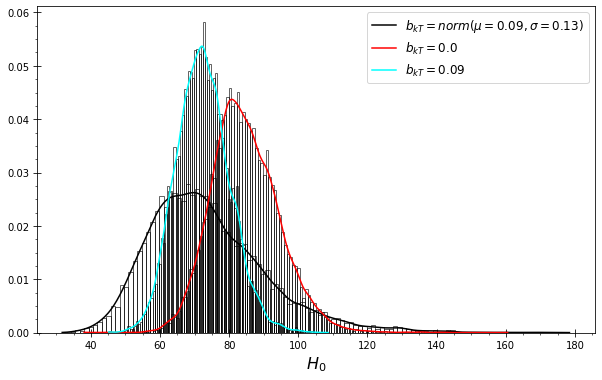

In [11]:
# Making the plot comparing H0 posteriors for different kT biases
fig, ax = plt.subplots(figsize=(10,6))
n_h0 = whist(h0_mcmc, plot=plt, label='$b_{kT}=norm(\mu=0.09, \sigma=0.13)$', color='black')
n_h00 = whist(h0_mcmc0, plot=plt, label='$b_{kT}=0.0$', color='red')
n_h09 = whist(h0_mcmc9, plot=plt, label='$b_{kT}=0.09$', color='cyan')
plt.legend(fontsize=12)
ax.tick_params(direction='inout', length=8)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.0025))
plt.xlabel('$H_0$', fontsize=16)
#fig.savefig('/Users/jwan/Documents/research 2020/plots for paper/H0_pdfs.jpeg')
plt.show()

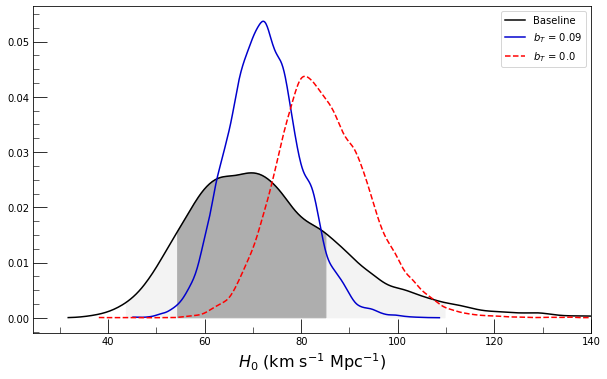

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
whist_ci(n_h0, plot=plt, plot_mode=False, plot_levels=False, plot_ci=False, color='black', label='Baseline')
whist_ci(n_h09, plot=plt, plot_mode=False, plot_levels=False, plot_ci=False, fill_ci=False, color='mediumblue', label='$b_T$ = 0.09')
whist_ci(n_h00, plot=plt, plot_mode=False, plot_levels=False, plot_ci=False, fill_ci=False, linestyle='dashed', color='red', label='$b_T$ = 0.0')
ax.tick_params(direction='in', length=14)
ax.tick_params(which='minor', direction='in', length=6)
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(0.0025))
plt.legend()
plt.xlabel('$H_0$ (km s$^{-1}$ Mpc$^{-1}$)', fontsize=16)
plt.xlim(right=140)
#fig.savefig('/Users/jwan/Documents/research 2020/plots for paper/H0_pdfs_new.png')
plt.show()

## HSE mass bias plot

In [61]:
riess = emcee.backends.HDFBackend("unblinded_run_20200909_Riess-prior.h5", read_only=True)
planck = emcee.backends.HDFBackend("unblinded_run_20200909_Planck-prior.h5", read_only=True)

flatchain_riess = riess.get_chain(discard=312, flat=True)
flatchain_planck = planck.get_chain(discard=312, flat=True)

h0_r = []
int_scatter_r = []
kt_bias_r = []
f_bias_r = []
for i in range(0, len(flatchain_riess)):
    h0_r.append(flatchain_riess[i][0])
    int_scatter_r.append(flatchain_riess[i][1])
    kt_bias_r.append(flatchain_riess[i][2])
    f_bias_r.append(flatchain_riess[i][3])
    
h0_p = []
int_scatter_p = []
kt_bias_p = []
f_bias_p = []
for i in range(0, len(flatchain_planck)):
    h0_p.append(flatchain_planck[i][0])
    int_scatter_p.append(flatchain_planck[i][1])
    kt_bias_p.append(flatchain_planck[i][2])
    f_bias_p.append(flatchain_planck[i][3])

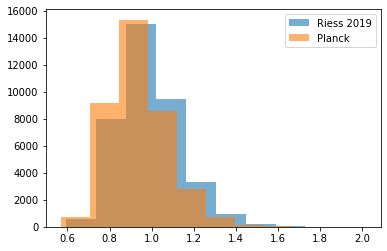

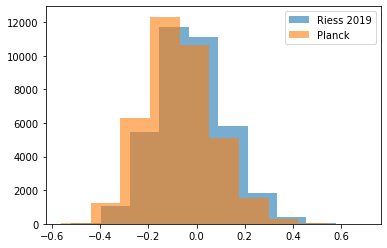

In [80]:
n = 37504

ml_over_mx = np.random.normal(loc=0.956, scale=np.sqrt(0.082**2 + 0.09**2), size=n)

##########################

b_r = np.array(kt_bias_r) + 1
nonth_r = 1/(b_r * ml_over_mx)
plt.hist(nonth_r, alpha=0.6, label='Riess 2019')

b_p = np.array(kt_bias_p) + 1
nonth_p = 1/(b_p * ml_over_mx)
plt.hist(nonth_p, alpha=0.6, label='Planck')

plt.legend()
plt.show()

##########################

plt.hist(np.log(nonth_r), alpha=0.6, label='Riess 2019')
plt.hist(np.log(nonth_p), alpha=0.6, label='Planck')
plt.legend()
plt.show()

In [ ]:
n_riess = whist(np.log(nonth_r))
n_planck = whist(np.log(nonth_p))

h_riess = whist_ci(n_riess, np.log(nonth_r), plot=plt, plot_mode=False, plot_levels=False, plot_ci=False, 
                   fill_ci=False, color='black', label='Riess 2019')
h_planck = whist_ci(n_planck, np.log(nonth_p), plot=plt, plot_mode=False, plot_levels=False, plot_ci=False, 
                    fill_ci=False, color='mediumblue', label='Planck')

plt.xlabel('HSE mass bias (log)')
plt.legend()

In [ ]:
print(h_riess)
print(h_planck)

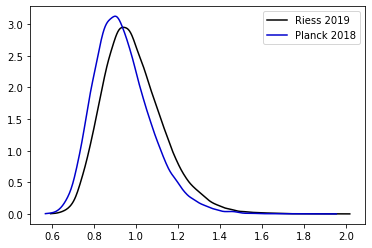

In [82]:
n_riess = whist(nonth_r)
n_planck = whist(nonth_p)

h_riess = whist_ci(n_riess, nonth_r, plot=plt, plot_mode=False, plot_levels=False, plot_ci=False, 
                   fill_ci=False, color='black', label='Riess 2019')
h_planck = whist_ci(n_planck, nonth_p, plot=plt, plot_mode=False, plot_levels=False, plot_ci=False, 
                    fill_ci=False, color='mediumblue', label='Planck')

plt.xlabel('HSE mass bias')
plt.legend()